# Machine Learning Engineer Nanodegree

## Project Capstone

## Credit Card Fraud Detection


Welcome to the final project of my Machine Learning Engineer Nanodegree! In this notebook, I'll explore whether or not a system can be trained to detect instances of financial fraud from a labeled dataset of credit card transactions. As such this is project is an example of Supervised Learning. To thorougly examine credit card fraud detection systems I will explore the effecitveness of the following techniques: 


1. **Benchmark Model** - The benchmark model will be a [Logistic Regression Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). This model will be implemented using the tooling in SKLearn and be used to compare all other models developed as part of this project.
2. **Complex Model** - I will then explore how using models like SVM or [xgboost](https://github.com/dmlc/xgboost) perform when applied to this binary classification problem.
3. **Neural Network** - In order to examine the effectiveness of complex solutions on this non-image domain I will develop a Neural Network architecture that is capable of classifying the instances of fraud. Subsequent analysis of the accuracy of the Neural Network architecture will allow direct comparison between complex and simple techniques in this problem space.
4. **AutoEncoders with TensorFlow** - Finally, in order to mitigate issues with the Credit Card Fraud dataset that I observed during this project I'll explore how AutoEncoders and Unsupervised learning can be applied to this domain. 


More information can be found in the project's [proposal.md](https://github.com/ChrisParsonsDev/mlnd/blob/master/capstone/PROPOSAL.md) 


#  NOTE:  This notebook works using Python 3.5 with Spark 2.1 Jupyter Kernel.  If you aren't running these versions, its recommended that you change the Kernel using the Kernel tab above in Data Science Experience.

# Importing The Data

The first thing we'll do is load some libraries.


In [5]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

In order to begin working with the [Credit Card Fraud](https://www.kaggle.com/dalpozz/creditcardfraud) data, access the dataset from the kaggle link and upload it using the Data button on the top right of Data Science Experience.  Once this is done, click on the blank cell below, then go to the Credit Card Fraud data set you loaded, hit the drop down button and select "Insert Pandas DataFrame".  This will populate the cell with the credentials required to access the data and insert into into a Pandas data frame.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Now, let's rename the data frame.

In [7]:
raw_data = df_data_1

From this subset of the Credit Card transation data, we can see various features for each transaction in the dataset: 

- **Class: ** The class label for the datapoint. Positive class (1) indicates an incident of credit card fraud and the Negative Class (0) is not an instance of fraud. 
- ** Time: ** The time in seconds between each transaction.
- ** V1 - V28: ** Due to the sensitive nature of financial information it is not possible to know specifics about each of the features in this dataset. However we do know that the data itself has been cleaned of extraneous values and has undergone Principle Component Analysis (PCA). 
- ** Amount: ** The amount of the transaction. 

The code cell below removes the Class field and stores it as "labels". 

In [9]:
# Store the 'Class' feature in a new variable and remove it from the dataset
labels = raw_data['Class']
features = raw_data.drop('Class', axis = 1)

# Show the new dataset with 'Class' removed
display(features.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


The sample produced by the '.head()' function now shows the Class feature removed from the DataFrame. For any single transaction 'features.loc[i]' the label is labels[i]. In order to appropriately compare the different Machine Learning techniques and models I must have some way of measuring their performance. Since the key success factor for this workload is how accurately it can predict or detect instances of fraud. I will explore three different performance metrics - Precision, Recall and Fscore. 

* Precision = TP/(TP+FP)
* Recall = TP/(TP+FN)
* [FScore](https://en.wikipedia.org/wiki/F1_score)

The function below can be used to compute these metrics. 

In [10]:
from sklearn.metrics import precision_recall_fscore_support

def accuracy(truth, pred):
    """ Returns accuracy score for input truth and predictions. """   
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        precision, recall, fscore, support = precision_recall_fscore_support(truth, pred, average='binary')
        return "Precision: {:.2f}, Recall: {:.2f}, Fscore: {:.2f}".format(precision, recall, fscore)
    else:
        return "Number of predictions does not match number of outcomes!"

### Examining The Dataset

In order to ensure the validity of any models produced, it is important to have a thorough understanding of the dataset itself. With Supervised Learning, specifically binary classification problems such as this, the distribution of samples in both positive and negative classes is pivotal. The code cell below explores this distribution.  

The dataset has 284807 samples, 492 of which are in the positive class


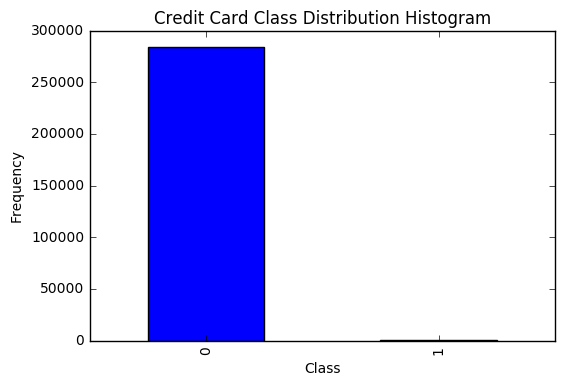

In [11]:
import matplotlib.pyplot as plt

# Print the number of positive and negative samples
count = 0
for entry in labels:
    if entry == 1:
        count += 1
print("The dataset has {} samples, {} of which are in the positive class".format(len(labels), count))

count_classes = pd.value_counts(raw_data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Credit Card Class Distribution Histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")


This histogram clearly demonstrates that with this particular dataset, pertaining to credit card fraud, there is an inbalance between the classes. Concretely we have significantly more negative samples, or not fraud, than we do examples of fraud. This is not entirely unexpected as the data contains all credit card transactions for a 24h period - however the disparity between the class distribution could skew results. For instance, a model that simply predicted nothing as fraud would be 99% accurate!!!

The positive 'fraud' class makes up ~0.17% of the raw data. Before attempting to model the data in any way - it's important to have a more balanced ratio between the classes. There are several ways of doing this: 

* Collect more data for the positive class
* Undersample the negative class
* Changing the performance metric 

As I've discussed previously, Financial Services data is difficult to come by so the notion of growing my dataset is not feasible within the scope of this project. In order to reduce the risk of potential overfitting I will reduce the number of samples in the negative class. I will collect a random selection of negative, not fraud, samples and attempt to balance the ratio of positive/negative samples.

However this process will induce an error in the dataset. The 'Time' feature tells me the number of elapsed seconds between transactions, when I randomly remove some of the samples this value will no longer be correct. In order to mitigate this I will simply exclude the 'Time' feature from the dataset used for testing. 

I have also observed that the 'Amount' feature is not normalised - I will scale this feature in the new dataset to mitigate any issue arising from the scale of the Amount feature. 

In the code block below I reduce the number of samples in the negative class to ~500 and remove the 'Time' feature which would have been corrupted by this reduction. 

The dataset contains 992 samples. Of which 492 are fraud and 500 are not


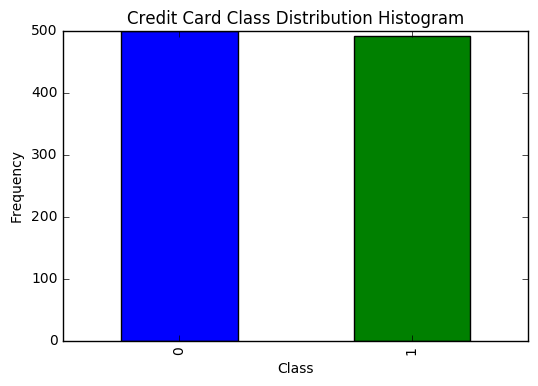

In [12]:
from sklearn.preprocessing import StandardScaler

# Separate positive and negative classes
negative_class = raw_data.loc[raw_data['Class'] == 0]
positive_class = raw_data.loc[raw_data['Class'] == 1]

# Randomly sample the negative class
random_selection = negative_class.sample(500)

frames = [random_selection, positive_class]
# Concatenate the positive class and the undersampled negative class
small_data = pd.concat(frames)
# Normalise the amount feature
small_data['Normalised_Amount'] = StandardScaler().fit_transform(small_data['Amount'].values.reshape(-1, 1))
small_data = small_data.drop(['Time','Amount'],axis=1)

# Drop the Time feature and extract the class label
small_data_features = small_data.drop('Class', axis=1)
small_data_labels = small_data['Class']

# Print the length of the new dataset/classes
print("The dataset contains {} samples. Of which {} are fraud and {} are not".format(len(small_data), len(positive_class), len(random_selection)))

# Draw histogram of new distribution
count_classes = pd.value_counts(small_data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Credit Card Class Distribution Histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

After the undersampling of the raw data I have a much more even distribution of both classes, which is clearly illustrated by the histogram. The dataset now has 992 samples, as opposed to the original 30k from the raw data. The distribution is not exactly 50:50 between both classes, there are 492 instances of fraud (the entire positive class from the original dataset) and 500 randomly selected rows from the negative class.

It was important to ensure that the rows were selected at random to eliminate any potential experimenter bias. 

# Modeling The Data


## Logistic Regression Classifier

Now I have read the data into a DataFrame, defined a function for computing the accuracy of the model and balanced the class distribution it is now time to start modeling the data. As discussed previously, the first technique I will use is SKLearn's LogisticRegression classifier. This model will serve as a benchmark for the more complicated models I explore later in this study. 

The code cell below defines the LogisticRegression classifier and reports it's accuracy. 

In [13]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(small_data_features, small_data_labels, test_size=0.25, random_state=42)

# Create a logistic regression classifier and fit it to the training set
bmark_clf = LogisticRegression(random_state=5)
bmark_clf.fit(X_train, y_train)

# Report the score of the prediction using the testing set
y_pred = bmark_clf.predict(X_test)
score = accuracy(y_test, y_pred)

print(score)

Precision: 0.97, Recall: 0.93, Fscore: 0.95


The benchmark model has an FScore (accuracy) of 0.94. This will act as a reference point/standard to compare all other techniques against. I think the fact that the LogisticRegression classifier has performed so well in this instance is testiment to the PCA conducted on the dataset. 

## SVM - Support Vector Machines

The next model I will test is the SVM classifier in SKLearn. An SVM model represents the examples as points in space. These points are then mapped so that examples from both classes (positive/negative, fraud/not fraud) are divided by a clear gap and the margin is maximised. New samples are then mapped into the same plane and a classification is made based on which side of the boundry they fall. SVMs are 'non-probablistic binary linear classifiers' and thus I would expect them to perform well for this use case. 

The code cell below trains an SVM for the Credit Card fraud data and then analyses the model's performance. 

In [14]:
from sklearn.svm import SVC

# Create a logistic regression classifier and fit it to the training set
svc_clf = SVC()
svc_clf.fit(X_train, y_train)

# Report the score of the prediction using the testing set
y_pred = svc_clf.predict(X_test)
score = accuracy(y_test, y_pred)

print(score)

Precision: 0.94, Recall: 0.93, Fscore: 0.94


### Comparison to Benchmark

The SVM model actually performed less well than the LogisticRegression classifier for this dataset. The SVM model was not able to detect as many instances of fraud as the benchmark. In the benchmark test, 94% of fraud cases were classified correctly. The SVM recalled ~2% less than this - making it less effective. 

### Comments

In practice SVMs and Logistic Regression's perform comparably. The performance of the SVM shows that the data is linearly sepearable, and there are no significant outliers skewing the model. 

The SVM algorithm implemented in SKLearn is based on libsvm. This technique is significantly more 'geometrically motivated' than the benchmark model. The goal here is not to define a probabilistic model, but to find an optimal separating hyperplane. The fact that we are seeing similar results between this and the benchmark simply indicates that the Logistic Regression is performing well and producing a 'wide margin' classifier, which is the goal of the SVM.

## Neural Network

I will use the TensorFlow framework to define a Neural Network architecture for detecting credit card fraud. This will allow me to explore the performance of NN architecture when compared directly to more basic Machine Learning algorithms. 

The code cell below defines the network itself.

In [24]:
import tensorflow as tf
sess = tf.Session()

# Convert DataFrames to Matricies for TF
trainX = X_train.as_matrix()
trainY = y_train.as_matrix()
testX = X_test.as_matrix()
testY = y_test.as_matrix()

# Reshape Labels
trainYShape = trainY.shape
trainY = trainY.reshape(trainYShape[0], 1)
trainY = np.concatenate((1-trainY, trainY), axis=1)
testYShape = testY.shape
testY = testY.reshape(testYShape[0], 1)
testY = np.concatenate((1-testY, testY), axis=1)

# Multiplier maintains fixed ratio of nodes between each layer
mulitplier = 1.5 

# Number of nodes in hidden layer 1
hidden_nodes1 = 15
hidden_nodes2 = round(hidden_nodes1 * mulitplier)
hidden_nodes3 = round(hidden_nodes2 * mulitplier)

# Input (features from dataset)
X_ = tf.placeholder(tf.float32, [None, 29]) 

# Layer 1
W1 = tf.Variable(tf.zeros([29, hidden_nodes1]))
b1 = tf.Variable(tf.zeros([hidden_nodes1]))
y1 = tf.nn.sigmoid(tf.matmul(X_, W1) + b1)

# Layer 2
W2 = tf.Variable(tf.zeros([hidden_nodes1, hidden_nodes2]))
b2 = tf.Variable(tf.zeros([hidden_nodes2]))
y2 = tf.nn.sigmoid(tf.matmul(y1, W2) + b2)

# Layer 3
W3 = tf.Variable(tf.zeros([hidden_nodes2, hidden_nodes3])) 
b3 = tf.Variable(tf.zeros([hidden_nodes3]))
y3 = tf.nn.sigmoid(tf.matmul(y2, W3) + b3)

# Layer 4
W4 = tf.Variable(tf.zeros([hidden_nodes3, 2])) 
b4 = tf.Variable(tf.zeros([2]))
y4 = tf.nn.softmax(tf.matmul(y3, W4) + b4)

# Output (classification) layer
y = y4
y_ = tf.placeholder(tf.float32, [None,2])

### Hyperparameters

The following hyperparameters can be adjusted to tune network performance 

In [25]:
learning_rate = 0.001
training_epochs = 30000 
display_step = 5000
batch_size = trainY.size

### Cost Function

I have elected to use TensorFlow's AdamOptimiser for the cost function. This is because the AdamOptimizer will automatically control the learning rate, in effect having a larger step size at each epoch and cause convergence more quickly. As the Adam algorithm determines this step size automatically, this convergence can be achieved without fine tuning which makes the Adam Optimizer ideal for this scenario. 

The downside to this is that the Adam algorithm will require more computation for each paramter at every epoch so that the moving averages and scaled gradient can be calculated. This will cause an increase in the training time! The model itself will also be ~3x larger than one created using the tf.train.GradientDescentOptimizer. 

I am also using a mean squared error loss function. While classically Cross-Entropy would be prefered over MSE for classification challenges such as this, I feel that due to the performance of the linear classifiers in earlier tests MSE will perform equally well in this case as it is ideally suited to regression problems. 

In [26]:
# Cross Entropy cost function
cost_fn = tf.reduce_sum(tf.pow(y_ - y, 2))/(2*batch_size)

# Define model optimiser
optimiser = tf.train.AdamOptimizer(learning_rate).minimize(cost_fn)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Initialize variables and tensorflow session
init = tf.global_variables_initializer()
sess.run(init)

### Training

Now that I have defined the Neural Network in TensorFlow, established a cost function, optimiser and initialised the TensorFlow variables/placeholders. The next step is to train the Model itself. In the following code block I feed the dataset to the TensorFlow model and report the Accuracy/Loss for the defined Epochs. 

In [27]:
# Record Accuracy/Cost values for visualisation
nn_training_accuracy = [] 
nn_training_cost = [] 
nn_test_accuracy = [] 
nn_test_cost = [] 

# For every training iteration
for iteration in range(training_epochs+1):
    # Take the classifier, and feed it the input data
    sess.run([optimiser, accuracy, cost_fn], feed_dict={X_: trainX, y_: trainY})
    # Every 5000 runs, determine accuracy by feeding model the test data
    if iteration % display_step == 0:
        epoch_train_accuracy, epoch_train_loss = sess.run([accuracy, cost_fn], feed_dict={X_: trainX, y_: trainY})
        epoch_test_accuracy, epoch_test_loss = sess.run([accuracy, cost_fn], feed_dict={X_: testX, y_: testY})
        print("Training Step: "+ str(iteration) + "  Test Accuracy =  " + str(epoch_test_accuracy) + " Test Loss = " + str(epoch_test_loss))
        nn_test_accuracy.append(epoch_test_accuracy)
        nn_test_cost.append(epoch_test_loss)
        # Stored for visualisation
        nn_training_accuracy.append(epoch_train_accuracy)
        nn_training_cost.append(epoch_train_loss)

Training Step: 0  Test Accuracy =  0.49596775 Test Loss = 0.04169115
Training Step: 5000  Test Accuracy =  0.91129035 Test Loss = 0.012210136
Training Step: 10000  Test Accuracy =  0.9072581 Test Loss = 0.014687923
Training Step: 15000  Test Accuracy =  0.8991935 Test Loss = 0.015771328
Training Step: 20000  Test Accuracy =  0.891129 Test Loss = 0.016445713
Training Step: 25000  Test Accuracy =  0.8951613 Test Loss = 0.016664784
Training Step: 30000  Test Accuracy =  0.8951613 Test Loss = 0.016649138


In [46]:
saver = tf.train.Saver()

### Evaulating The Model

Without any hyperparameter optimisation we can see that the Neural Network Model achieves a 90% accuracy for the input dataset. In order to gain a better intuition of what is happening during the training phase, the following code cell renders a visualisation of the loss/accuracy sampled during training. 

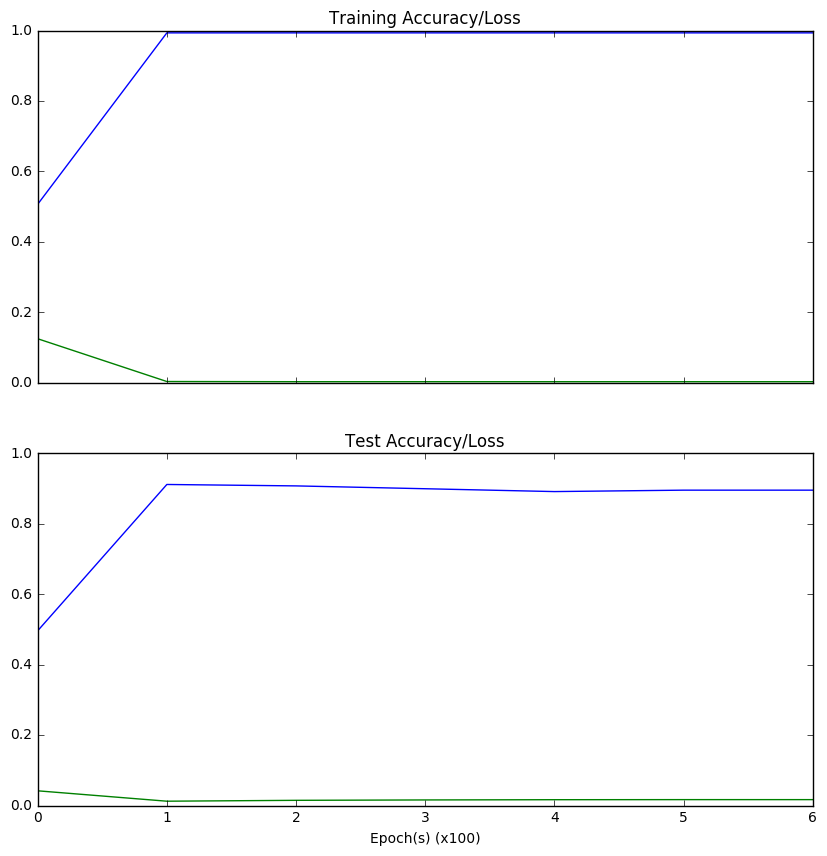

In [28]:
# Render visualisation of Training loss and accuracy

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,10))

ax1.plot(nn_training_accuracy)
ax1.plot(nn_training_cost)
ax1.set_title('Training Accuracy/Loss')

ax2.plot(nn_test_accuracy)
ax2.plot(nn_test_cost)
ax2.set_title('Test Accuracy/Loss')

plt.xlabel('Epoch(s) (x100)')
plt.show()


### Comparison to Benchmark

Interestingly the benchmark model and Neural Network actually performed equivalently for this dataset. Both models were able to predict the instances of fraud in the test set with ~94% accuracy. I think this result illustrates two points:

1. That Neural Networks perform well in comparison to more basic models for a variety of workloads
2. The Credit Card Fraud dataset used in this experiment is clearly linearly separable. Thus LogisticRegression/other linear classifiers will perform extrodinarly well. This would not be the case if the dataset was less linearly seperable. 

I think it is also important to note that this is a very simple Neural Network implementation, it would be possible to further optimise this network with hyperparamter tuning/more hidden layers. 

### Comments

The visualisations above show that for both our training and test datasets the Neural Network improved considerably over the training iterations. Being able to visualise both the training/test loss in this way is a powerful tool as it allows us to concretely identify instances of overfitting. As the system is performing equally well for both datasets we can infer that the Neural Network model has not overfit the data and has the ability to generalise well. 

It is also clear from these visualisations that the Neural Network plateaued at ~93% accuracy for both training and test datasets. In order to further improve the accuracy we would need to change the network definition or modify the hyperparameters/loss function. 


## AutoEncoders with TensorFlow


To conclude this report I will explore how AutoEncoders can be used to define Neural Networks capabile of identifying credit card fraud. My original intention was to apply Transfer Learning of an existing Neural Network definition to this problem and evaluate it's performance - however after conducting this work, and gaining a better understanding of the dataset I feel that using AutoEncoders is a better academic discussion. 

What makes AutoEncoders so interesting is that they are an instance of ** Unsupervised Learning **. Unlike all of the other methods discussed previously, this technique does not require a subset of labeled data. When you consider the wider domain problem, that is to detect fraud at enterprise scale, not having the prerequisite of labelling your existing dataset to identify the model is a really powerful tool. 

Because we are now working with unlabled data, I will revert to use the unbalanced dataset from the raw data but without the label that classifies the dataset. I will then work with the assertion that no such labels exist for the data. 

So what are AutoEncoders? 

An autoencoder, which can sometimes be refered to as an autoassociator or Diabolo network, is an Artificial Neural Network which can be used for unsupervised learning. This technique aims to learn an encoding for a set of data. The simplest architecture for an autoencoder is a feedforward non-recurrent neural network. This network has an input layer, output layer and N hidden layers connecting these two. The output layer has the same number of nodes as the input layer with the purpose of redeveloping its own inputs as opposed to predicting the target value. 


Some typical use cases of AutoEncoders include: 

* Data Denoising - reducing the amount of noise/error in an image for example. 
* Dimensionality Reduction - for instance in this example, where we look to perform feature extraction and reduce the number of input features to make understanding the data a less complex task. 
* VAE (Variational AutoEncoders) - Here we learn the parameters of the probability distribution by modeling the input data as opposed to learning some function (as is the case with traditional AutoEncoders) 


How does it work? 

I'll use an AutoEncoder to 'learn' the common/frequent patterns that are shared by the significant proportion of the training data. The Root Mean Squared Error will be large for the data that does not conform to these patterns. It's this step that is ideal for our use case, we have a large amount of 'not fraud' data which we will use to build a pattern of the 'normal' and anything that lies outside that will have a large RMSE which we can use to infer that these points are 'fraud' or examples of the positive class. 

There are two approaches: 

1. We select a threshold for the error and assume everything over a certain value is fraud
2. We rank all the RMSE values and take the largest (say 0.17%) and state that these are fraudulent

I appreciate I'm cheating a little bit with point two because I know that 0.17% of my dataset is fraudulent. However it would be possible to narrow down on this value in the real world via repitition. 


### Building The Dataset

As discussed, we need to work with the whole dataset for this technique minus the label. In the code cell below I normalise the Amount value and remove the label so we're working with an instance of unsupervised learning. 

In [35]:
# Compose a dataset of unlabled data by removing the Class feature. 
ae_data = features

# Normalise the amount feature
ae_data['Normalised_Amount'] = StandardScaler().fit_transform(ae_data['Amount'].values.reshape(-1, 1))
ae_data = ae_data.drop(['Time','Amount'],axis=1)

# Train/Test split this data..
X_train_ae, X_test_ae, y_train_ae, y_test_ae = train_test_split(ae_data, labels, test_size=0.25, random_state=42)

# Print the length of the new dataset/classes
print("The dataset contains {} samples.".format(len(ae_data)))

The dataset contains 284807 samples.


The ae_data dataset includes all the rows from the raw data without the "Class" feature. As before I have also normalised the Amount column for consistency. I have performed a train/test split on the data (reserving 25% for testing) in order to perform Cross Validation.  

### Building the Model

The next step is to build the AutoEncoder itself. In the code cell below you can see that I have defined the hyperparameters which, with the exception of the learning rate, are the same as the pervious TensorFlow experiment. I then define the network parameters, specifying the number of features in the hidden layers and the feature dimension. 

In [38]:
# Hyperparameters 
learning_rate = 0.01
training_epochs = 30000
display_step = 500

# Network Parameters
n_hidden_1 = 15 
n_hidden_2 = 5 
n_input = X_train_ae.shape[1]  
X_ = tf.placeholder("float", [None, n_input])
 
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}
 
# Encoder
def encoder(x):
    # Encoder Hidden layer with tanh activation #1
    layer_1 = tf.nn.tanh(tf.add(tf.matmul(x, weights['encoder_h1']),
              biases['encoder_b1']))
    # Decoder Hidden layer with tanh activation #2
    layer_2 = tf.nn.tanh(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
              biases['encoder_b2']))
    return layer_2
 
# Decoder
def decoder(x):
    # Encoder Hidden layer with tanh activation #1
    layer_1 = tf.nn.tanh(tf.add(tf.matmul(x, weights['decoder_h1']),
            biases['decoder_b1']))
    # Decoder Hidden layer with tanh activation #2
    layer_2 = tf.nn.tanh(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
            biases['decoder_b2']))
    return layer_2
 
# Construct model
encoder_op = encoder(X_)
decoder_op = decoder(encoder_op)
 
# Prediction
y_pred_ae = decoder_op
y_true_ae = X_
 
# Measure model accuracy
correct_prediction = tf.equal(tf.argmax(y_true_ae,1), tf.argmax(y_pred_ae,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Define loss and optimizer, minimize the squared error
cost = tf.reduce_mean(tf.pow(y_true_ae - y_pred_ae, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)


The variable X is the placeholder for the input data. The two Dictionaries (Weights, Biases) hold all of the parameters that will be optimised during the training phase. Each layer of the AutoEncoder uses a tanh activation function, this outputs values as: 

value < 0 < value

Thus is ideally suited for this use case. 

Unlike the Neural Network experiement above I will use a Root Mean Squared Error (RMSE) cost function to optimise the parameters of the model. 

### Training the Model

The code cell below trains the AutoEncoder. Every `display_step` iterations we assess the accuracy of the model against the training and test data. After the training is completed we will be able to plot these values on a chart to assess: 

1. The performance of the AutoEncoder/Model during the training phase
2. How the AutoEncoder performs for this workload compared to the previous experiments.



#  The next 2 cells are optional.  They will not run well without GPU acceleration.
If you want to see how this model runs, you can run the cell to see how it runs for reference.  The remaining tutorial will show you the accuracy.  You can restart the kernel once you get an idea how long Deep Learning models take to run without GPU acceleration.  You can do this by pressing the curly arrow in the toolbar.  For reference, we have embedded a video link showing this model running on an IBM Power 8 Minsky server which is optimised for Deep Learning:  More information available here:  https://developer.ibm.com/linuxonpower/deep-learning-powerai/

In [39]:
# Initialise the variables
init = tf.global_variables_initializer()    

# Store train/test accuracy for visualisation
ae_training_accuracy = []
ae_training_cost = []
ae_test_accuracy = []
ae_test_cost = []

with tf.Session() as sess:
    sess.run(init)
    # Training loop
    for iteration in range(training_epochs+1):
        # Take the classifier, and feed it the input data
        sess.run([optimizer, cost], feed_dict={X_: X_train_ae})
        # Every 50 runs, determine accuracy by feeding model the test data
        if iteration % display_step == 0:
            epoch_train_accuracy, epoch_train_loss = sess.run([accuracy, cost], feed_dict={X_: X_train_ae})
            epoch_test_accuracy, epoch_test_loss = sess.run([accuracy, cost], feed_dict={X_: X_test_ae})
            print("Training Step: "+ str(iteration) + "  Test Accuracy =  " + str(epoch_test_accuracy) + " Test Loss = " + str(epoch_test_loss))
            # Stored for visualisation
            ae_training_accuracy.append(epoch_train_accuracy)
            ae_training_cost.append(epoch_train_loss)
            ae_test_accuracy.append(epoch_test_accuracy)
            ae_test_cost.append(epoch_test_loss)
    print("Optimisation Finished!!")

Training Step: 0  Test Accuracy =  0.024592 Test Loss = 1.85535
Training Step: 500  Test Accuracy =  0.332294 Test Loss = 0.813473
Training Step: 1000  Test Accuracy =  0.409567 Test Loss = 0.748549
Training Step: 1500  Test Accuracy =  0.422095 Test Loss = 0.720727
Training Step: 2000  Test Accuracy =  0.438541 Test Loss = 0.702962
Training Step: 2500  Test Accuracy =  0.439033 Test Loss = 0.688143
Training Step: 3000  Test Accuracy =  0.435255 Test Loss = 0.677505


KeyboardInterrupt: 

# Neural Networks are compute intensive!  See this last model running on an IBM Systems "Minsky" server.
This server is optimised for AI workflows for Deep Learning Neural Networks.  When we run the above model to build the Neural Network, it runs in 12 minutes!  See it in action here:  https://ibm.ent.box.com/s/5vaphf8m98umi2epus5668pslul0tm1u
For more information about PowerAI and Deep Learning from IBM Cognitive Systems, the following links will be a useful start:
https://developer.ibm.com/linuxonpower/deep-learning-powerai/
https://www.ibm.com/uk-en/marketplace/high-performance-computing
https://www.ibm.com/us-en/marketplace/power-systems-ac922/details

### Evaluating The Model

Using an equivalent number of Epochs as the Neural Network we can see that the AutoEncoder achieved a 49.3% accuracy for the training dataset. The following code cell will render a visualisation of the accuracy and loss for the train/test datasets achieved during the training process. 

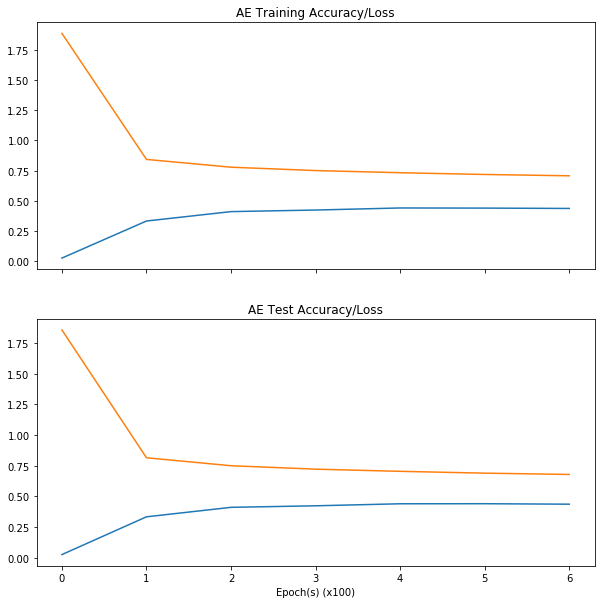

The AutoEncoder achieved a maximum accuracy of 43.5254633427% on the validation dataset.


In [40]:
# Render visualisation of Training loss and accuracy

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,10))

ax1.plot(ae_training_accuracy)
ax1.plot(ae_training_cost)
ax1.set_title('AE Training Accuracy/Loss')

ax2.plot(ae_test_accuracy)
ax2.plot(ae_test_cost)
ax2.set_title('AE Test Accuracy/Loss')

plt.xlabel('Epoch(s) (x100)')
plt.show()

print("The AutoEncoder achieved a maximum accuracy of {}% on the validation dataset.".format(ae_test_accuracy[len(ae_test_accuracy) -1] * 100))


### Comparison to Benchmark

On the Credit Card Fraud dataset AutoEncoders did not perform as well as Neural Networks or the benchmark model. The AutoEncoder achieved an ultimate accuracy of 49.3% on the Test dataset. Unfortunately, many of the steps I would subsequently have taken to optimise this model cannot be done due to the feature engineering conducted on the dataset. With this in mind it is not possible to make an accurate inference about the applicability of AutoEncoders in this domain. In order to more rigourously test this model I could follow the following proceedure: 

1. Collect more data (having more samples in the positive class would be beneficial)
2. Conduct feature engineering on the raw data. In order to improve the performance of the model I would like to conduct PCA/Feature Engineering on the raw data. However, as previously discussed, due to the nature of the domain this is not possible.
3. Hyperparameter optimisation/more hidden layers. 


### Comments

The visualisations above show that for both our training and test datasets the AutoEncoder improved  over the training iterations. Being able to visualise both the training/test loss in this way is a powerful tool as it allows us to concretely identify instances of overfitting. As the system is performing poorly both training and validation datasets we cannot infer whether or not AutoEncoders, and unsupervised learning, could be used to tackle this domain problem. 


# Conclusion

## Reflection

With this project I set out with the goal of determining whether or not it was possible to build a system, using Machine Learning that could recognise and detect Credit Card fraud. While, as previously discussed, there were challenges with the dataset caused by privacy concerns I feel that I have successfully demonstrated that it is indeed possible to build such a system. 

I have used a variety of techniques, from simple `LogisticRegression` classifiers through to more complicated Neural Networks and AutoEncoders to build systems capable of detecting Credit Card Fraud. I have ranked the models in terms of accuracy here: 

1. `LogisitcRegression` Classifier
2. `Neural Network`
3. `SVM`
4. `AutoEncoder`

The LogisticRegression classifier performed really well at this task, achieving an accuracy of 94%. This classifier was capable of detecting fraud in the validation dataset at a very high level of accuracy. This model shows that there is validity in persuing Machine Learning as a technique for identifying Credit Card fraud for the entire industry. 

The fact that LogisticRegression classifier, and SVM performed so well also tells us interesting things about the underlying dataset. These techniques are extremely effective with linearly separable data. That is to say, it is possible to deliniate both classes with a single boundry. 

As a result of the composition of the dataset simple classifiers performed really well. I was also interested to see how well Neural Networks would manage a binary classification task. The NN Model achieved a relatively similar accuracy to the other classifiers. While it was more complicated to implement the Neural Network, it achieved a similar accuracy and would scale to more complicated problem domains should the data be available. 

Unfortunatley due to the dimensionality reduction already conducted on the dataset the AutoEncoder did not perform particularly well for this project. In order to improve the system I would need access to more data, and conduct PCA/analysis on the various features. I firmly believe this approach would be applicable to allow Financial Services organisations to leverage unsupervised learning to automatically detect Credit Card Fraud from unlabled data. This would be extremely valuable because in the wild, the data itself is very much unlabled.  


## Improvement

In this project the dataset has already undergone Dimensionality Reduction, Feature Normalisation and PCA. In reality, Financial Services institutions do not hold their data in this processed format. In order to more accuratley simulate the real world scenario I would require access to this raw data. Unfortunately (or forunately) due to privacy concerns and legislation, it is not possible to observe this information in its raw form. 

I would also have liked access to more datapoints in the Positive class. Only 0.17% of the data is an instance of Fraud and this ultimately impacts the scalability and ecological validity of the model. As I had to significanlty reduce the dataset size for this analysis there is a high chance of overfitting. If I were to repeat this study I would certainly seek a larger dataset.  

Finally I have thoroughly enjoyed this project, and the entire nanodegree program. It has given me a deep insight into Machine Learning, Deep Learning and the challenges faced by Data Scientists. :) 


# Publishing a model to Watson Data Platform
Now that we've built these models, let's publish the most accurate (Logistic Regression) to the Watson Data Platform so we can reference it as an API for live categorisation.  The model created in the first step was referenced as "bmark_clf"

Steps:
1.  Launch Watson Data Platform.  You'll see an icon on the top right (looks like a dashboard) in white to launch WDP.
2.  In the Overview Pane in WDP, create a "New Instance" for the Machine Learning row, select Lite as the service plan and create it, noting the service name.
3. In the Apps and Services tab, you should see your new machine learning service.  Click on it and go to the Service Credentials tab.  In the blank cell below, copy and paste the json for your service when you click the "view credentials" button.
Wrap it like so it looks like the example below:

wml_credentials={
  "url": "https://ibm-watson-ml.mybluemix.net",
  "access_key": "MG9Ebx3iQz83A4pkC98tvtLd9Ugbw/n0eEbsbPZnFGQfx2na8ct7PLkP25QkKSs2HxGxQ3pIogjgEOjN0TGDTcL0h32gVzPkwMbmHXNpi+FQYUqQmv73SQJrb1WXWeZv",
  "username": "7ed7f441-9b78-4c4b-8c81-5f554b18b9fe",
  "password": "bb09c02b-cddf-41c8-98c8-db0b65567e88",
  "instance_id": "18473054-26cd-4337-ba31-1f63407a10c8"
}

# Loading the WML libraries to this notebook environment

Run through the next 4 cells to load the correct libraries that will allow us to interact with the WML platform and build and interrogate our ML model.

In [10]:
!pip install watson-machine-learning-client --user --upgrade

Requirement already up-to-date: watson-machine-learning-client in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s02d-89763d67c5e73d-ee27e7ff6674/.local/lib/python3.5/site-packages
Requirement already up-to-date: lomond in /usr/local/src/conda3_runtime.v27/4.1.1/lib/python3.5/site-packages (from watson-machine-learning-client)
Requirement already up-to-date: tabulate in /usr/local/src/conda3_runtime.v27/4.1.1/lib/python3.5/site-packages (from watson-machine-learning-client)
Requirement already up-to-date: tqdm in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s02d-89763d67c5e73d-ee27e7ff6674/.local/lib/python3.5/site-packages (from watson-machine-learning-client)
Requirement already up-to-date: requests in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s02d-89763d67c5e73d-ee27e7ff6674/.local/lib/python3.5/site-packages (from watson-machine-learning-client)
Requirement already up-to-date: urllib3 in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s02d-89763d67c5e73d-ee27e7ff6674/.local/lib/p

In [16]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [17]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [18]:
import json

instance_details = client.service_instance.get_details()

print(json.dumps(instance_details, indent=2))

{
  "metadata": {
    "created_at": "2018-01-17T16:41:03.572Z",
    "url": "https://ibm-watson-ml.mybluemix.net/v3/wml_instances/18473054-26cd-4337-ba31-1f63407a10c8",
    "modified_at": "2018-01-17T16:41:03.572Z",
    "guid": "18473054-26cd-4337-ba31-1f63407a10c8"
  },
  "entity": {
    "region": "us-south",
    "account": {
      "id": "500550309",
      "type": "TRIAL",
      "name": "Mark Woolnough's Account"
    },
    "deployments": {
      "url": "https://ibm-watson-ml.mybluemix.net/v3/wml_instances/18473054-26cd-4337-ba31-1f63407a10c8/deployments"
    },
    "source": "Bluemix",
    "status": "Active",
    "plan_id": "3f6acf43-ede8-413a-ac69-f8af3bb0cbfe",
    "published_models": {
      "url": "https://ibm-watson-ml.mybluemix.net/v3/wml_instances/18473054-26cd-4337-ba31-1f63407a10c8/published_models"
    },
    "organization_guid": "a66b3262-9e58-4578-be3f-f228f04fe49b",
    "plan": "lite",
    "space_guid": "ac25c7d9-76b8-4cbe-ad3d-ee27e7ff6674",
    "usage": {
      "deploym

# Create the model properties, publish and create the model.

Edit the model_props and model_name cells below and add your own details.

In [19]:
model_props = {"authorName":"Fred Smith", "authorEmail":"fred.smith@uk.ibm.com"}
model_name = "LOCALLY created CC Fraud Logistic Regression classification model"

In [20]:
published_model = client.repository.store_model(model=bmark_clf, name=model_name, meta_props=model_props, \
                                                training_data=X_train, training_target=y_train)

In [21]:
published_model_guid = client.repository.get_model_uid(published_model)
model_details = client.repository.get_details(published_model_guid)
print(published_model_guid)
print(json.dumps(model_details, indent=2))

8141cbde-7729-45e3-895d-1b90ed6b7067
{
  "metadata": {
    "created_at": "2018-01-31T12:07:19.309Z",
    "url": "https://ibm-watson-ml.mybluemix.net/v3/wml_instances/18473054-26cd-4337-ba31-1f63407a10c8/published_models/8141cbde-7729-45e3-895d-1b90ed6b7067",
    "modified_at": "2018-01-31T12:07:19.368Z",
    "guid": "8141cbde-7729-45e3-895d-1b90ed6b7067"
  },
  "entity": {
    "latest_version": {
      "created_at": "2018-01-31T12:07:19.368Z",
      "url": "https://ibm-watson-ml.mybluemix.net/v3/ml_assets/models/8141cbde-7729-45e3-895d-1b90ed6b7067/versions/d0cd36b3-7197-4608-88d2-59647d975c10",
      "guid": "d0cd36b3-7197-4608-88d2-59647d975c10"
    },
    "runtime_environment": "python-3.5",
    "name": "LOCALLY created CC Fraud Logistic Regression classification model",
    "learning_configuration_url": "https://ibm-watson-ml.mybluemix.net/v3/wml_instances/18473054-26cd-4337-ba31-1f63407a10c8/published_models/8141cbde-7729-45e3-895d-1b90ed6b7067/learning_configuration",
    "model_

In [22]:
created_deployment = client.deployments.create(model_uid=published_model_guid, name="Deployment of locally created scikit model")

# Let's find the scoring endpoint.  

Note, you can get this by examining the model in WDP > Manage > Launch Watson Machine Learning Dashboard and drilling into the details from the Manage and Deployments tabs.

In [23]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)

In [24]:
print(scoring_endpoint)

https://ibm-watson-ml.mybluemix.net/v3/wml_instances/18473054-26cd-4337-ba31-1f63407a10c8/published_models/8141cbde-7729-45e3-895d-1b90ed6b7067/deployments/3d7d2e6e-3f61-4828-bd0f-c034c3a0429f/online


# Create a test data entry, review it and then do a prediction using the deployed model...

In [167]:
score_data = {"fields": ["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Normalised_Amount"],"values": \
[[1.191857111,0.266150712,0.166480113,0.448154078,0.060017649,-0.082360809,-0.078802983,0.085101655,-0.255425128,-0.166974414,1.612726661,1.065235311,0.489095016,-0.143772296,0.635558093,0.463917041,-0.114804663,-0.18336127,-0.145783041,-0.069083135,-0.225775248,-0.638671953,0.101288021,-0.339846476,0.167170404,0.125894532,-0.008983099,0.014724169,2.69]]}

In [170]:
score_data = {"fields": ["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Normalised_Amount"],"values": \
[[1.240307089,0.312835605,0.304504552,0.716313591,-0.198580292,-0.545808466,-0.208553662,-0.039480832,1.284336052,-0.443922935,2.056726597,-2.408086703,0.491361296,1.591917675,-0.172278339,0.804516882,0.433886026,0.741770172,0.021016605,-0.190433184,-0.424024626,-1.074001083,0.105050949,-0.134883665,0.161434527,0.06332376,-0.062690764,0.007853268,0.89]]}

In [173]:
score_data = {"fields": ["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Normalised_Amount"],"values": \
[[1.991976096,0.158475887,-2.583440645,0.408669993,1.151147061,-0.096694744,0.223050267,-0.068383878,0.577829384,-0.888721676,0.491140242,0.72890332,0.380428046,-1.948883349,-0.832498136,0.519435549,0.903562377,1.197314718,0.593508847,-0.017652257,-0.164350328,-0.295135167,-0.072172531,-0.450261313,0.313266609,-0.289616586,0.002987582,-0.015308813,42.53]]}

In [176]:
score_data = {"fields": ["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Normalised_Amount"],"values": \
[[1.351375422,-0.425547245,0.570015731,-0.714758896,-0.851516477,-0.545766008,-0.548262832,-0.11726866,-0.92890314,0.527862477,0.2143809,0.120601985,1.22795891,-0.346980122,0.918411824,0.881210412,0.446527667,-2.165732473,0.249457179,0.116477708,-0.05337705,-0.197176604,0.14542173,0.077592058,0.192863309,-0.454133078,0.03301427,0.02256851,15]]}

In [151]:
print(score_data)

{'fields': ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Normalised_Amount'], 'values': [[1.191857111, 0.266150712, 0.166480113, 0.448154078, 0.060017649, -0.082360809, -0.078802983, 0.085101655, -0.255425128, -0.166974414, 1.612726661, 1.065235311, 0.489095016, -0.143772296, 0.635558093, 0.463917041, -0.114804663, -0.18336127, -0.145783041, -0.069083135, -0.225775248, -0.638671953, 0.101288021, -0.339846476, 0.167170404, 0.125894532, -0.008983099, 0.014724169, 2.69]]}


In [177]:
predictions = client.deployments.score(scoring_endpoint, score_data)

In [178]:
print(predictions)

{'fields': ['prediction', 'probability'], 'values': [[1, [9.7237291059038e-05, 0.999902762708941]]]}


# The first two transactions are predicted to be not fraud.  The second two transactions return a fraud value.